In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("vaccination_tweets.csv")
print(data.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [2]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [3]:
data = data.dropna()

In [4]:
print(data.describe()) #descriptive statistics

                 id  user_followers   user_friends  user_favourites  \
count  4.749000e+03    4.749000e+03    4749.000000      4749.000000   
mean   1.355333e+18    5.069683e+04    1341.396926     14523.124447   
std    1.280104e+16    3.545440e+05    3453.847283     36379.651961   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.344929e+18    1.740000e+02     215.000000       497.000000   
50%    1.352030e+18    6.480000e+02     549.000000      2713.000000   
75%    1.364940e+18    2.728000e+03    1419.000000     12258.000000   
max    1.384788e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  4749.000000  4749.000000  
mean      1.545378     9.385555  
std      13.395572    55.280915  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     5.000000  
max     678.000000  1979.000000  


In [5]:
#clean the text column
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


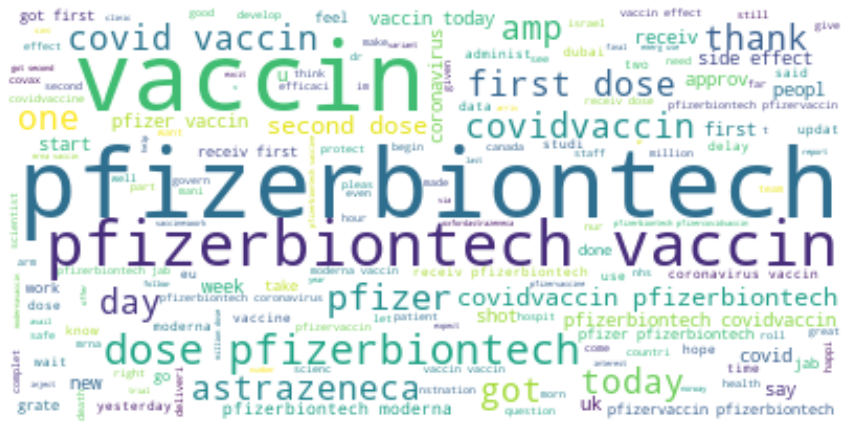

In [6]:
#the most used words in large font and the less used words in small font
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

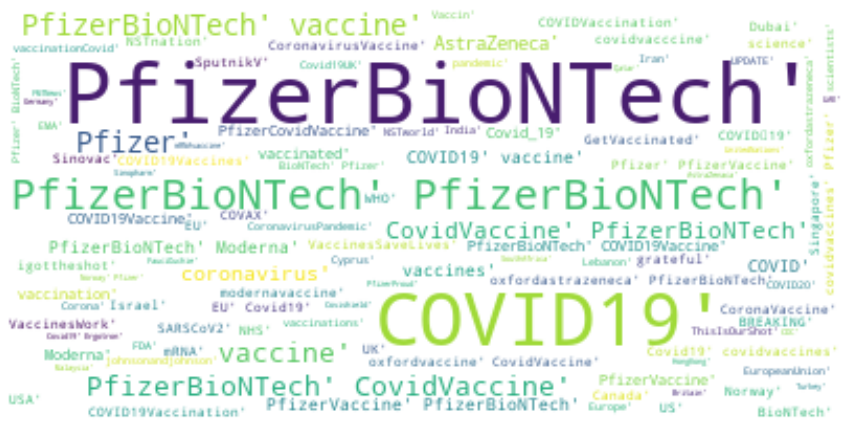

In [7]:
#word cloud of the hashtags column
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The “user_verified” column in the dataset shows whether the users who have shared their opinions are verified by Twitter or not. A verified user on Twitter is a public figure or a celebrity. So let’s have a look at how many users were verified who shared their opinions about the Pfizer vaccine:

In [8]:
data["user_verified"].value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

In the above output, False shows the count of unverified users and True shows the count of verified users. Now let’s move to the task of sentiment analysis of the Pfizer vaccine. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 text  Positive  Negative  \
0   folk said daikon past could treat cytokin stor...     0.252     0.000   
2   coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
6   bit sad claim fame success vaccin patriot comp...     0.353     0.166   
9   covidvaccin state start get  monday us say pak...     0.000     0.000   
10  death close  mark million peopl wait pfizerbio...     0.000     0.302   

    Neutral  
0     0.748  
2     1.000  
6     0.481  
9     1.000  
10    0.698  


In [10]:
#calculate how most of the people felt about the Pfizer vaccine
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [11]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  417.75800000000004
Negative:  188.84900000000025
Neutral:  4142.396000000006


The total of positive and negative is very less than Neutral, so we can say that the discussion of the Twitter users was about the awareness of the Pfizer vaccine rather than sharing its benefits or drawbacks.